# ***Exercise 2,Answer 1:*** We have to solve;

min 

In [1]:
!pip install -q pyomo

In [2]:
from pyomo.environ import *

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as mpl

In [5]:
df = pd.read_csv("ex2.csv")

In [6]:
df

i    Ri    Vi     Bi   Ai   Avg.view   Avg.ads
0  1   175   945   2800   23   2.962963  0.024339
1  2   450   832   3900   40   4.687500  0.048077
2  3  1050  2007  24900   78  12.406577  0.038864
3  4   900   800  36450   64  45.562500  0.080000
4  5    19   780    366    4   0.469231  0.005128
5  6  3550  5005  38500  150   7.692308  0.029970

In [7]:
model = ConcreteModel()

In [8]:
model.constraint = ConstraintList()

In [9]:
model.y = Var([i for i in range(0,6)], domain = Reals)

In [10]:
model.x = Var([i for i in range(0,6)],[i for i in range (2)], domain = NonNegativeReals)

In [11]:
model.b0=Var(domain=NonNegativeReals)
model.b1=Var(domain=Reals)
model.b2=Var(domain=Reals)

In [12]:
model.objective= Objective(expr=sum(model.x[i,j] for i in range (6) for j in range (2)))

In [13]:
for i in range (6):
  model.constraint.add(expr=model.x[i,0]-model.x[i,1]==df["Ri"][i]-model.b0-df["Avg.view"][i]*model.b1-df["Avg.ads"][i]*model.b2)

In [14]:
model.pprint()

5 Set Declarations
    constraint_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    6 : {1, 2, 3, 4, 5, 6}
    x_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain              : Size : Members
        None :     2 : x_index_0*x_index_1 :   12 : {(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1), (4, 0), (4, 1), (5, 0), (5, 1)}
    x_index_0 : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    6 : {0, 1, 2, 3, 4, 5}
    x_index_1 : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {0, 1}
    y_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    6 : {0, 1, 2, 3, 4, 5}

5 Var Declarations
    b0 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : S

In [15]:
!apt-get install -y -qq coinor-cbc

In [16]:
opt_cbc = SolverFactory('cbc')

In [17]:
result = opt_cbc.solve(model)
print('solver status:', result.solver.status)
print('solver termination condition:',result.solver.termination_condition)
print('solver time taken:',result.solver.time)

solver status: ok
solver termination condition: optimal
solver time taken: 0.021511077880859375


In [18]:
p1 = [model.b0()+df["Avg.view"][i]*model.b1()+df["Avg.ads"][i]*model.b2() for i in range (6)]

***Exercise 2,Answer 4:***  Solver status = ok

solver termination condition = optimal

optimal solution values for decision variable

b0= 0.0

b1= 4.0039722

b2= 8969.6127

optimal objective function value = 3986.158753

When p=1, observation-forecasting revenue and actual revenue have more difference in the i=1,3,5,6. 

In [19]:
print('\nObjective=',model.objective())
print('b0=',model.b0())
print('b1=',model.b1())
print('b2=',model.b2())



Objective= 3986.158753
b0= 0.0
b1= 4.0039722
b2= 8969.6127


In [20]:
!wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64

In [21]:
solver = SolverFactory('ipopt', executable='/content/ipopt')

In [22]:
def non_linear(p):
  global model2
  model2=ConcreteModel()
  model2.x=Var(range(6),range(2),domain=NonNegativeReals)
  model2.b=Var(range(3),initialize=2)
  def objective(model2):
    return sum ((model2.x[i,0]+model2.x[i,1])**p for i in range (6))
  model2.objective=Objective(rule=objective,sense=minimize)
  model2.constraints=ConstraintList()
  for i in range (6):
    model2.constraints.add(expr=model2.x[i,0]-model2.x[i,1]==df["Ri"][i]-model2.b[0]-df["Avg.view"][i]*model2.b[1]-df["Avg.ads"][i]*model2.b[2])
    result = solver.solve(model2)
  print('solver status:', result.solver.status)
  print('solver termination condition:',result.solver.termination_condition)
  print('solver time taken:',result.solver.time)
  p2=[model2.b[0]()+df["Avg.view"][i]*model2.b[1]()+df["Avg.ads"][i]*model2.b[2]() for i in range (6)]
  print('\nObjective=',model2.objective())
  print('b0=',model2.b[0]())
  print('b1=',model2.b[1]())
  print('b2=',model2.b[2]())

In [23]:
non_linear(1.5)

solver status: ok
solver termination condition: optimal
solver time taken: 0.034645795822143555

Objective= 188066.92403206913
b0= 503.7405804979684
b1= 2.723598706605352
b2= 4802.720279259801


In [24]:
non_linear(2)

solver status: ok
solver termination condition: optimal
solver time taken: 0.02617049217224121

Objective= 8399946.933907244
b0= 884.3228326085559
b1= 1.8562362168625863
b2= 3097.0705811830744


**Exercise 2,Answer 5:** $\mathbf{Solution}$

p>1

Minimize $$\sum_{i=1}^6\minQ_i \mid^{p}$$



where $Q_{i}$=Ri-$\tilde{Ri}^~$

$\tilde{Ri}^~$=Estimated Revenue

$\tilde{Ri}^~$=b0+b1Ti+b2Di>=0

because ipopt solver can not read the modulus so we can write

$\sum_{i=1}^6(((Ri-b0-b1Ti-b2Di)^2^{0.5})^p$

since |x|=$\sqrt[]{x}$

a0>=0,$a1,a2\in R$

***Exercise 2,Answer 7:*** When p=1.5 \\
Objective= 188066.92403206913 \\
b0= 503.7405804979684 \\
b1= 2.723598706605352 \\
b2= 4802.720279259801 \\

p=2 \\


Objective= 8399946.933907244 \\
b0= 884.3228326085559 \\
b1= 1.8562362168625863 \\
b2= 3097.0705811830744 \\

In [25]:
results = solver.solve(model2)

In [26]:
print('solver status:', result.solver.status)
print('solver termination condition:',result.solver.termination_condition)
print('solver time taken:',result.solver.time)
p1_5=[model2.b[0]()+df["Avg.view"][i]*model2.b[1]()+df["Avg.ads"][i]*model2.b[2]() for i in range (6)]
print('\nObjective=',model.objective())
print('b0=',model.b0())
print('b1=',model.b1())
print('b2=',model.b2())

solver status: ok
solver termination condition: optimal
solver time taken: 0.021511077880859375

Objective= 3986.158753
b0= 0.0
b1= 4.0039722
b2= 8969.6127


In [27]:
non_linear(2)



solver status: ok
solver termination condition: optimal
solver time taken: 0.024031877517700195

Objective= 8399946.933907244
b0= 884.3228326085559
b1= 1.8562362168625863
b2= 3097.0705811830744


In [29]:
p2=[model2.b[0]()+df["Avg.view"][i]*model2.b[1]()+df["Avg.ads"][i]*model2.b[2]() for i in range (6)]

In [30]:
df['forecasting revenue when p=1']=p1
df['forecasting revenue when p=1.5']=p1_5
df['forecasting revenue when p=2']=p2

In [32]:
df

i    Ri    Vi     Bi   Ai   Avg.view   Avg.ads  \
0  1   175   945   2800   23   2.962963  0.024339   
1  2   450   832   3900   40   4.687500  0.048077   
2  3  1050  2007  24900   78  12.406577  0.038864   
3  4   900   800  36450   64  45.562500  0.080000   
4  5    19   780    366    4   0.469231  0.005128   
5  6  3550  5005  38500  150   7.692308  0.029970   

   forecasting revenue when p=1  forecasting revenue when p=1.5  \
0                    230.171652                      965.201228   
1                    449.999999                     1041.921564   
2                    398.270402                     1027.716847   
3                    899.999999                     1216.663242   
4                     47.876800                      901.076249   
5                    299.619348                      991.420871   

   forecasting revenue when p=2  
0                    965.201228  
1                   1041.921564  
2                   1027.716847  
3                   1216.663242  
4                    901.076249  
5                    991.420871

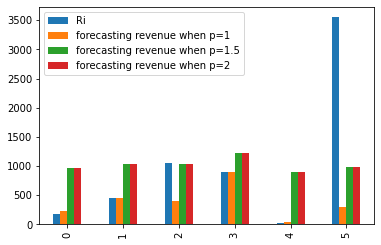

In [31]:
df.loc[:,['Ri','forecasting revenue when p=1','forecasting revenue when p=1.5','forecasting revenue when p=2']].plot(kind='bar')

***Exercise 2,Answer 8:*** Our forecast model for p=1 estimated revenue appropriately since estimated value of revenue for video (1,2,4,5) approximately  equal to actual revenue  for videos respectively.

***Exercise 2, Answer 9:*** 

we prefer p=2 for this model because it predict better than other two its squre mean error is less than other two so better to minimize error take p=2 